# Basic Data Handling and Processing
In this notebook we will, preprocess the data first and visualise it using matplotlib

## Modules
The modules or library we are using here is `matplotlib` for data visualization and `numpy` for calcuations and stuff

In [86]:
import matplotlib.pyplot as plt
import numpy as np

## Dataset (TV marketing)
This project utilizes [TV marketing](https://www.kaggle.com/datasets/devzohaib/tvmarketingcsv/data) dataset from Kaggle and following is the attributes it has:

- `TV`:     Represent amount in ($) spent on TV advertisements 
- `sales`:  Represent sales done after advertising the product/service

This dataset was reviewed for missing values and outliers. Given its small size and low variance, no additional cleaning was neccessary. Furthermore, we will going to perform all necessary preprocessing for our model to train.

In [87]:
data = np.genfromtxt('data/raw/tvmarketing.csv', delimiter=',', names=True)

## Features and Output

- `X`:  features (TV)
- `Y`:  output (Sales) 

In [88]:
X=data['TV']
Y=data['Sales']
print(f"Money spent on TV sales X: {X[:5]}")
print(f"Money spent on TV sales Y: {Y[:5]}")
print(f"Training Examples X: {X.shape}")
print(f"Training Examples Y: {Y.shape}")
print(f"X range: {np.min(X)} - {np.max(X)}")
print(f"Y range: {np.min(Y)} - {np.max(Y)}")

Money spent on TV sales X: [230.1  44.5  17.2 151.5 180.8]
Money spent on TV sales Y: [22.1 10.4  9.3 18.5 12.9]
Training Examples X: (200,)
Training Examples Y: (200,)
X range: 0.7 - 296.4
Y range: 1.6 - 27.0


### Following will be the plot for the data set:

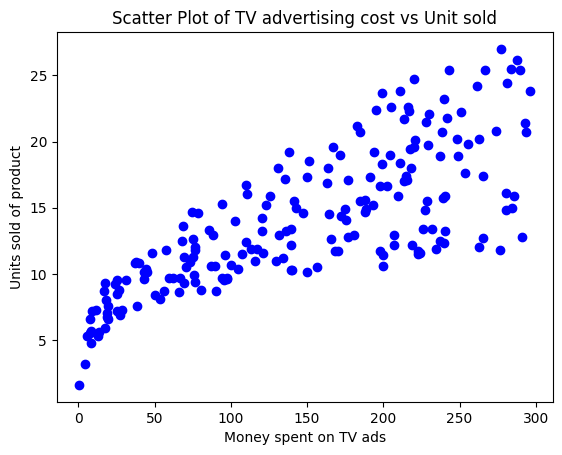

In [89]:

plt.scatter(X, Y,color='blue', label='Data Points')
plt.title('Scatter Plot of TV advertising cost vs Unit sold')
plt.xlabel('Money spent on TV ads')
plt.ylabel('Units sold of product')
plt.savefig('outputs/figures/SLR/plot.png', format='png')
plt.show()

## Feature Scaling
If we look at the unscaled plot of same data then the plot will look like the output of following code below, the limits of Y is too low then the limit of X, i.e.

- `X`= [0.7 - 296.4]
- `Y`= [1.6 - 27.0]

The `X` values are aggregated in the bottom making the plot look like the plot below. This will be problematic when we find `w` and `b` using **gradient descent**, so we will scale these values using feature scaling techniques **Z-score normalization** and **Mean Normalization** and eventually choose what will be the best for our dataset.


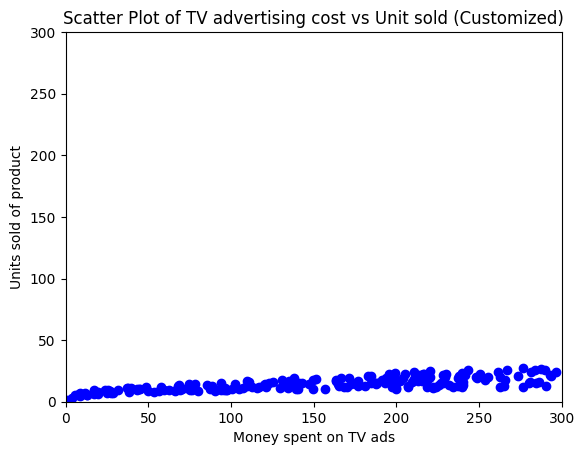

In [90]:
plt.scatter(X, Y,color='blue', label='Data Points')
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.title('Scatter Plot of TV advertising cost vs Unit sold (Customized)')
plt.xlabel('Money spent on TV ads')
plt.ylabel('Units sold of product')
plt.savefig('outputs/figures/SLR/custom_plot.png', format='png')
plt.show()

## Z-Score Normalization
This technique very oftenly used to scale features, following are the steps to scale features using this technique:

- Find Expected Value or Mean (${\sigma}$) of `X` and  `Y`
- Find Standard Deviation(${\mu}$) of `X` and `Y`
- Plug it into the following this formula:

For X:

$$Z_x = \frac{X - \mu_x}{\sigma_x}$$

For Y:

$$Z_y = \frac{Y - \mu_y}{\sigma_y}$$


the limit will vary from $-\infty$ to $\infty$.

In [91]:
#Z-Score Normalization

#Finding mean
X_mean=np.mean(X)
Y_mean=np.mean(Y)

# Finding standard deviation
stdev_x=np.std(X)
stdev_y=np.std(Y)

# Pluging the findings to expression
Z_X=(X-X_mean)/stdev_x
Z_Y=(Y-Y_mean)/stdev_y

print(f"Money spent on TV sales(X): {Z_X[:5]}")
print(f"Money spent on TV sales(Y): {Z_Y[:5]}")
print()
print(f"X range: {np.min(Z_X):.3f} - {np.max(Z_X):.3f}")
print(f"Y range: {np.min(Z_Y):.3f} - {np.max(Z_Y):.3f}")

Money spent on TV sales(X): [ 0.96985227 -1.19737623 -1.51615499  0.05204968  0.3941822 ]
Money spent on TV sales(Y): [ 1.55205313 -0.69604611 -0.90740587  0.86033029 -0.21568303]

X range: -1.709 - 1.744
Y range: -2.387 - 2.494


### Plot after Z-Score Normalization (Unscaled and Scaled)

Observations:
- The unscaled plot is scattered well just like scaled plot.
- The Gradient Descent will converge faster now
- We correctly implemented the normalization procedure since the Scaled plot of Z values looks identical to the previous values of `X` and `Y`

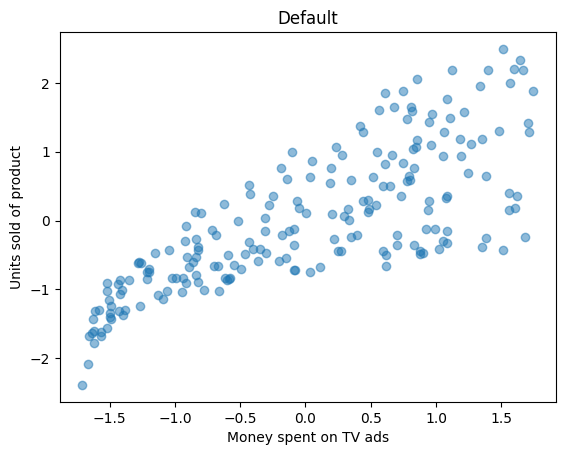

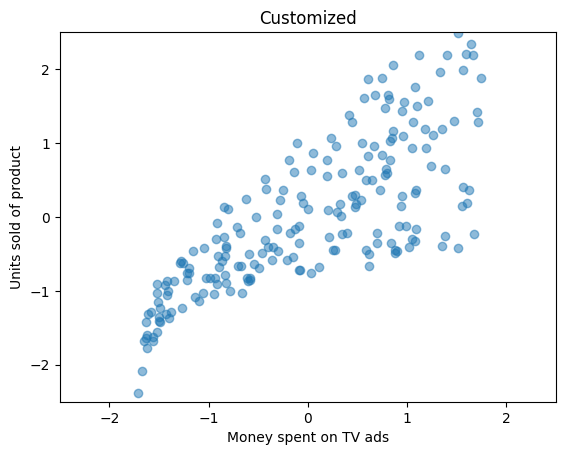

In [92]:
plt.scatter(Z_X,Z_Y,alpha=0.5)
plt.title('Default')
plt.xlabel('Money spent on TV ads')
plt.ylabel('Units sold of product')
plt.savefig('outputs/figures/SLR/zscore_plot.png', format='png')
plt.show()

plt.scatter(Z_X,Z_Y,alpha=0.5)
plt.title('Customized')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.xlabel('Money spent on TV ads')
plt.ylabel('Units sold of product')
plt.savefig('outputs/figures/SLR/zscore_plot_custom.png', format='png')
plt.show()

## Mean Normalization
This technique is not as much a standard to scale feature but we need comparison between both to choose the best for our dataset, this technique can be implemented as follows:

- Find minimum values from `X` and `Y` arrays.
- plug it in the follwing respective expressions:

For X:

$$ X_{scaled}=\frac{X-\mu _x}{X_{max}-X_{min}}$$

For Y:

$$ Y_{scaled}=\frac{Y-\mu _y}{Y_{max}-Y_{min}}$$

The new data obtain usually fall between $[-1,1]$, however in edge cases the values may go beyond this range.



In [93]:
# Mean Normalization

#Finding minimum value of X
x_min=np.min(X)
y_min=np.min(Y)

#Finding minimum value of Y
x_max=np.max(X)
y_max=np.max(Y)

#Plugging it into the expression
x_scaled=(X-X_mean)/(x_max-x_min)
y_scaled=(Y-Y_mean)/(y_max-y_min)

print(x_scaled[:5])
print(y_scaled[:5])
print()
print(f"X range: {np.min(x_scaled):.3f} - {np.max(x_scaled):.3f}")
print(f"Y range: {np.min(y_scaled):.3f} - {np.max(y_scaled):.3f}")

[ 0.28088434 -0.34677883 -0.43910213  0.0150744   0.11416131]
[ 0.31801181 -0.14261811 -0.1859252   0.17627953 -0.04419291]

X range: -0.495 - 0.505
Y range: -0.489 - 0.511


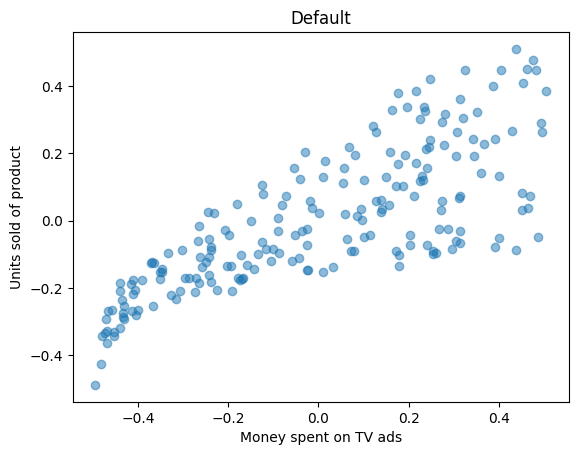

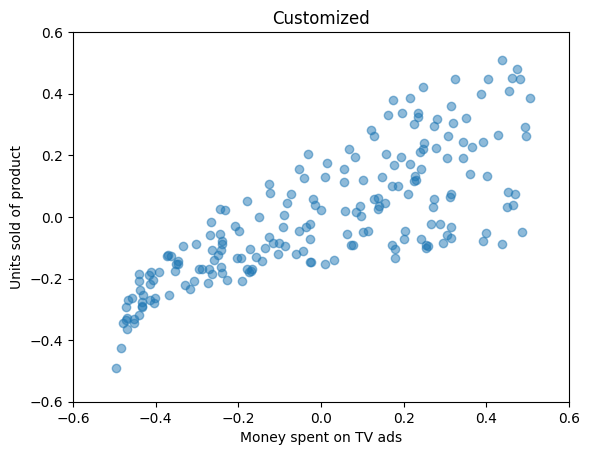

In [94]:
plt.scatter(x_scaled,y_scaled,alpha=0.5)
plt.title('Default')
plt.xlabel('Money spent on TV ads')
plt.ylabel('Units sold of product')
plt.savefig('outputs/figures/SLR/mean_plot.png', format='png')
plt.show()


plt.scatter(x_scaled,y_scaled,alpha=0.5)
plt.title('Customized')
plt.xlim(-0.6,0.6)
plt.ylim(-0.6,0.6)
plt.xlabel('Money spent on TV ads')
plt.ylabel('Units sold of product')
plt.savefig('outputs/figures/SLR/mean_plot_custom.png', format='png')
plt.show()

## Comparing scaled values

Now, we have to decide which values to use, but first look at the limits of both `Z_X,Z_Y` and `x_scaled,y_scaled` buy running the following code, the output will be:

- For **Z-score Normalization**: `X range:-1.709 - 1.744` and `Y range:-2.387 - 2.494`
- For **Mean Normalization**: `X range:-0.495 - 0.505` and `Y range:-0.489 - 0.511`

In [95]:
# Ranges after Z-score Normalization 
print(f"X range:{np.min(Z_X):.3f} - {np.max(Z_X):.3f}")
print(f"Y range:{(np.min(Z_Y)):.3f} - {np.max(Z_Y):.3f}")

# Ranges after Mean Normalization 
print(f"X range:{np.min(x_scaled):.3f} - {np.max(x_scaled):.3f}")
print(f"Y range:{np.min(y_scaled):.3f} - {np.max(y_scaled):.3f}")

X range:-1.709 - 1.744
Y range:-2.387 - 2.494
X range:-0.495 - 0.505
Y range:-0.489 - 0.511


## Deciding what to use

Observations:
- The values obtained from **Z-Score** is roughly falling $[-1.8,1.8]$ for `X` and $[-2.5,2.5]$ for `Y`.
- The values obtained from **Mean normalization** is roughly falling [-1,1] for both attibutes.

Inference:
- We will use the attributes obtained from **Mean normalization**, why?
- Because the ranges of both attibutes perfectly aligns with each other and,
- The dataset has low variance and less outliers hence using these values do not create any further complications

In [96]:
X=x_scaled
Y=y_scaled

## Splitting data into Training and Testing sets

To test the accuracy and other aspects of model, it will be appropirate to split the data in different sets. We will going to use $80%$ of it to train and $20%$ to test.

Following would be procedure to do so:

- Split the data in ratio of 80 and 20.
- Shuffle the indices to avoid bias.
- Carefully emplace the values `X` and `Y` in `X_train, Y_train` and `X_test, Y_train`.
- Save both sets in seperate csv files


In [97]:
N = len(X)  # total samples
train_size = round(N * 0.8)  # 80% training

# Shuffle your data first to avoid bias
indices = np.arange(N)
np.random.shuffle(indices)

# Shuffle X and Y together
X_shuffled = X[indices]
Y_shuffled = Y[indices]

# Split
X_train = X_shuffled[:train_size]
Y_train = Y_shuffled[:train_size]

X_test = X_shuffled[train_size:]
Y_test = Y_shuffled[train_size:]


## Saving in CSV files

Procedure:
- Combine both values in a matrix of 2x2
- Save to csv files

In [98]:
# Combine X and Y into a 2D array
data_to_save = np.column_stack((X_train, Y_train))

# Save to a training and test CSV files
output_path = 'data/processed/tvmarketing_scaled_train.csv'
np.savetxt(output_path, data_to_save, delimiter=',', header='TV,Sales')

print(f"Training Data saved to {output_path}")
data_to_save = np.column_stack((X_test, Y_test))

output_path = 'data/processed/tvmarketing_scaled_test.csv'
np.savetxt(output_path, data_to_save, delimiter=',', header='TV,Sales')

print(f"Test data saved to {output_path}")


Training Data saved to data/processed/tvmarketing_scaled_train.csv
Test data saved to data/processed/tvmarketing_scaled_test.csv
